In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_ut=pd.read_csv('capmetro_UT.csv')

In [4]:
df=pd.read_csv('capmetro_UT.csv')

In [5]:
# df_ut.head()
df

timestamp  boarding  alighting day_of_week  temperature  \
0     2018-09-01 06:00:00         0          1         Sat        74.82   
1     2018-09-01 06:15:00         2          1         Sat        74.82   
2     2018-09-01 06:30:00         3          4         Sat        74.82   
3     2018-09-01 06:45:00         3          4         Sat        74.82   
4     2018-09-01 07:00:00         2          4         Sat        74.39   
...                   ...       ...        ...         ...          ...   
5819  2018-11-30 20:45:00        43         29         Fri        70.73   
5820  2018-11-30 21:00:00        24         19         Fri        69.88   
5821  2018-11-30 21:15:00        33         16         Fri        69.88   
5822  2018-11-30 21:30:00        25         15         Fri        69.88   
5823  2018-11-30 21:45:00        21         13         Fri        69.88   

      hour_of_day month  weekend  
0               6   Sep  weekend  
1               6   Sep  weekend  
2               6   Sep  weekend  
3               6   Sep  weekend  
4               7   Sep  weekend  
...           ...   ...      ...  
5819           20   Nov  weekday  
5820           21   Nov  weekday  
5821           21   Nov  weekday  
5822           21   Nov  weekday  
5823           21   Nov  weekday  

[5824 rows x 8 columns]

In [6]:
df_ut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    5824 non-null   object 
 1   boarding     5824 non-null   int64  
 2   alighting    5824 non-null   int64  
 3   day_of_week  5824 non-null   object 
 4   temperature  5824 non-null   float64
 5   hour_of_day  5824 non-null   int64  
 6   month        5824 non-null   object 
 7   weekend      5824 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 364.1+ KB


In [7]:
df_ut['temperature'].describe()

count    5824.000000
mean       69.282473
std        13.540249
min        29.180000
25%        59.195000
50%        72.750000
75%        79.290000
max        97.640000
Name: temperature, dtype: float64

In [8]:
df_ut=df_ut.melt(id_vars=['timestamp','day_of_week','temperature','hour_of_day','month','weekend'],
           var_name='metric',
           value_name='people'      
           )

In [9]:
df_ut.tail()

timestamp day_of_week  temperature  hour_of_day month  \
11643  2018-11-30 20:45:00         Fri        70.73           20   Nov   
11644  2018-11-30 21:00:00         Fri        69.88           21   Nov   
11645  2018-11-30 21:15:00         Fri        69.88           21   Nov   
11646  2018-11-30 21:30:00         Fri        69.88           21   Nov   
11647  2018-11-30 21:45:00         Fri        69.88           21   Nov   

       weekend     metric  people  
11643  weekday  alighting      29  
11644  weekday  alighting      19  
11645  weekday  alighting      16  
11646  weekday  alighting      15  
11647  weekday  alighting      13

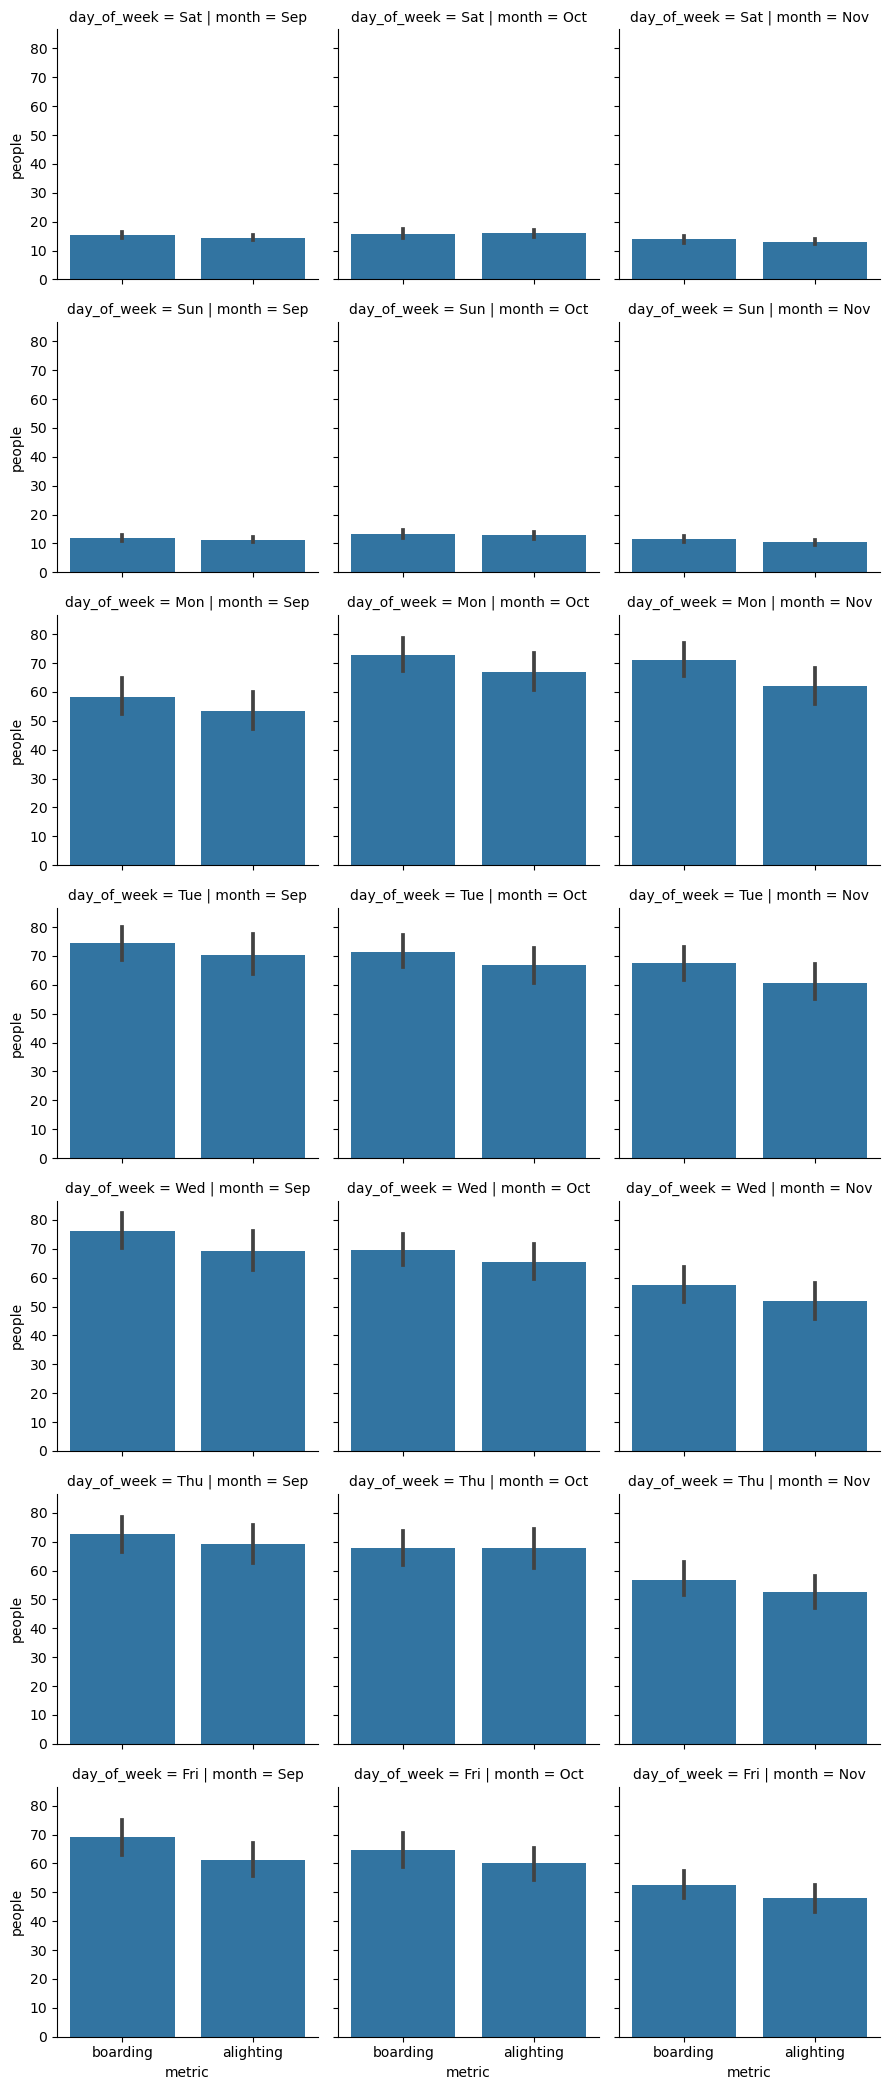

In [10]:
g = sns.FacetGrid(df_ut, col='month',row='day_of_week')
g.map(sns.barplot,'metric' ,'people')

#### Conclusion drawn

On weekends across the three months, people boarding and deboadring are nearly same.<br>
October Mondays saw more people boarding/de-boarding as comapared to other months.<br>
In general more people boarded/de-boarded on Tue/Wed/Thurs/Fri in the month of Sep followed by October.<br>
People boarding/de-boarding in Nov was lowest- this could be attributed to the Thanksgiving holiday which was on 22nd Nov Thursday.<br>

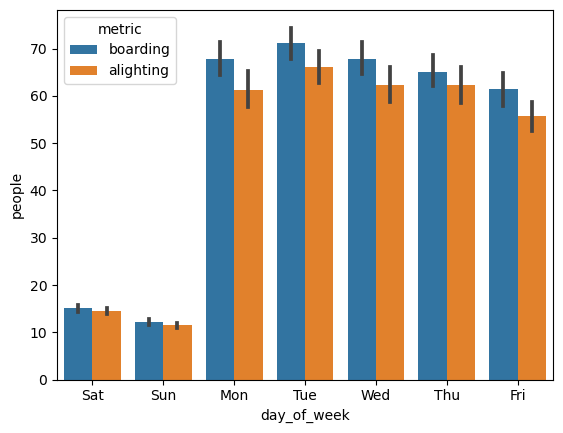

In [11]:
g=sns.barplot(x = 'day_of_week' ,y = 'people',data=df_ut,hue='metric')

#### Conclusion drawn
Over the course of 3 months, maximum people board/de-board the bus on Tuedays

In [12]:
def get_temp(x):
    if x<40:
        y='Less than 40'
    elif x<50:
        y='40-50'
    elif x<60:
        y='50-60'
    elif x<70:
        y='60-70'
    elif x<80:
        y='70-80'
    elif x<90:
        y='80-90'
    elif x<100:
        y='90-100'
    
    return y
    
df_ut['temp']=df_ut['temperature'].apply(get_temp)  
        

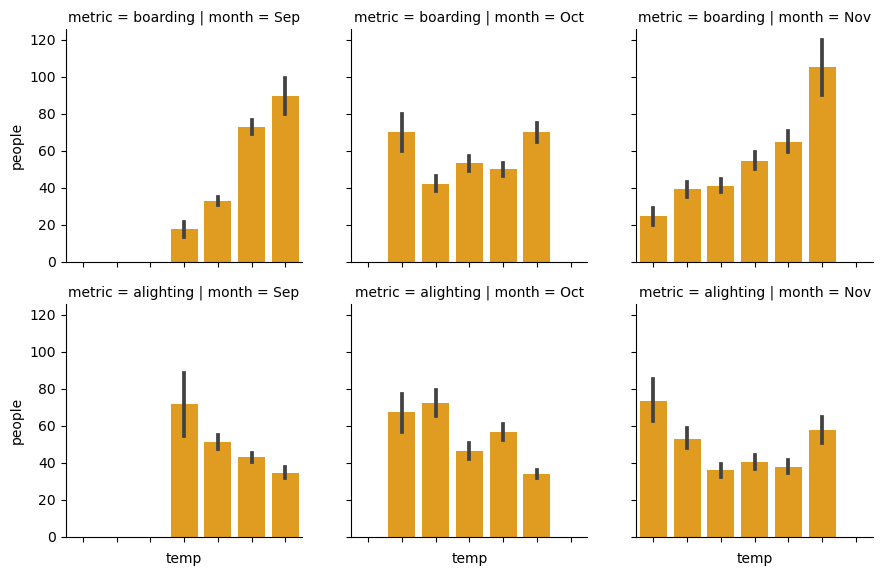

In [13]:
g = sns.FacetGrid(df_ut, col='month',row='metric')
g.map(sns.barplot,'temp' ,'people',order=['Less than 40','40-50','50-60','60-70','70-80','80-90','90-100'],color='orange')
for axes in g.axes.flat:
    axes.set_xticklabels(
        axes.get_xticklabels(), rotation=65, horizontalalignment="right"
    )

#### Conclusion drawn

Nearly for all months as the temp increases, people boarding the Capital Metro bus increases. <br>
For all months, the maximum no of people deboadring the bus is during the lowest temp range in that particular month 
(i.e 60-70 is lowest for Sep and maximum people de-board during this temp)  

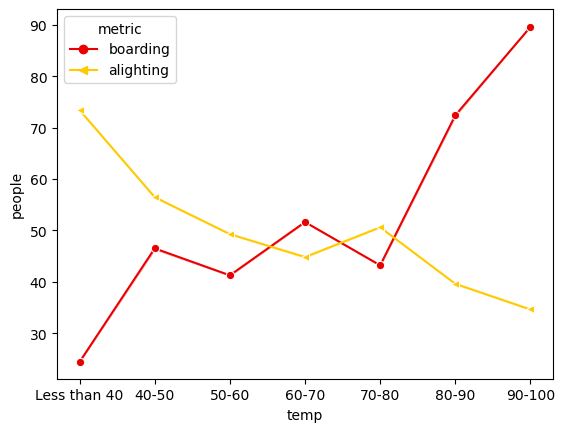

In [14]:
df_ut['temp']= pd.Categorical(df_ut['temp'],
                                   categories=['Less than 40','40-50','50-60','60-70','70-80','80-90','90-100'],
                                   ordered=True)
g=sns.lineplot(x = 'temp' ,y = 'people',data=df_ut,hue='metric',style='metric',
              palette = 'hot', dashes= False, markers= ["o","<"],ci=False)

#### Conclusion drawn

Over the course of 3 months, maximum people board the bus during high temperature while maximum people de-board the bus during low temperature.
Similarly, minimum people board the bus during low temperature while minimum people de-board the bus during high temperature.

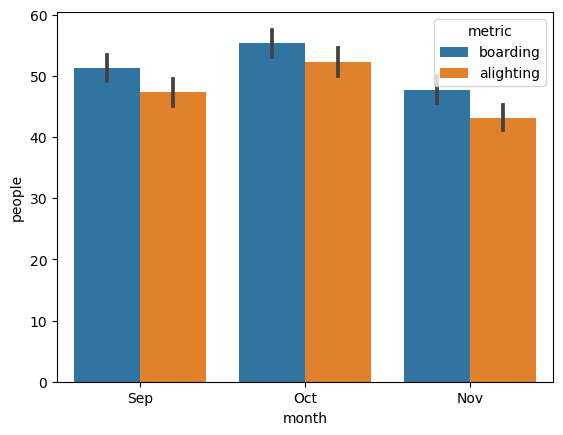

In [15]:
g=sns.barplot(x = 'month' ,y = 'people',data=df_ut,order=['Sep','Oct','Nov'],hue='metric')                    

#### Conclusion drawn

Majority of the people boarded/deboarded during the October Month

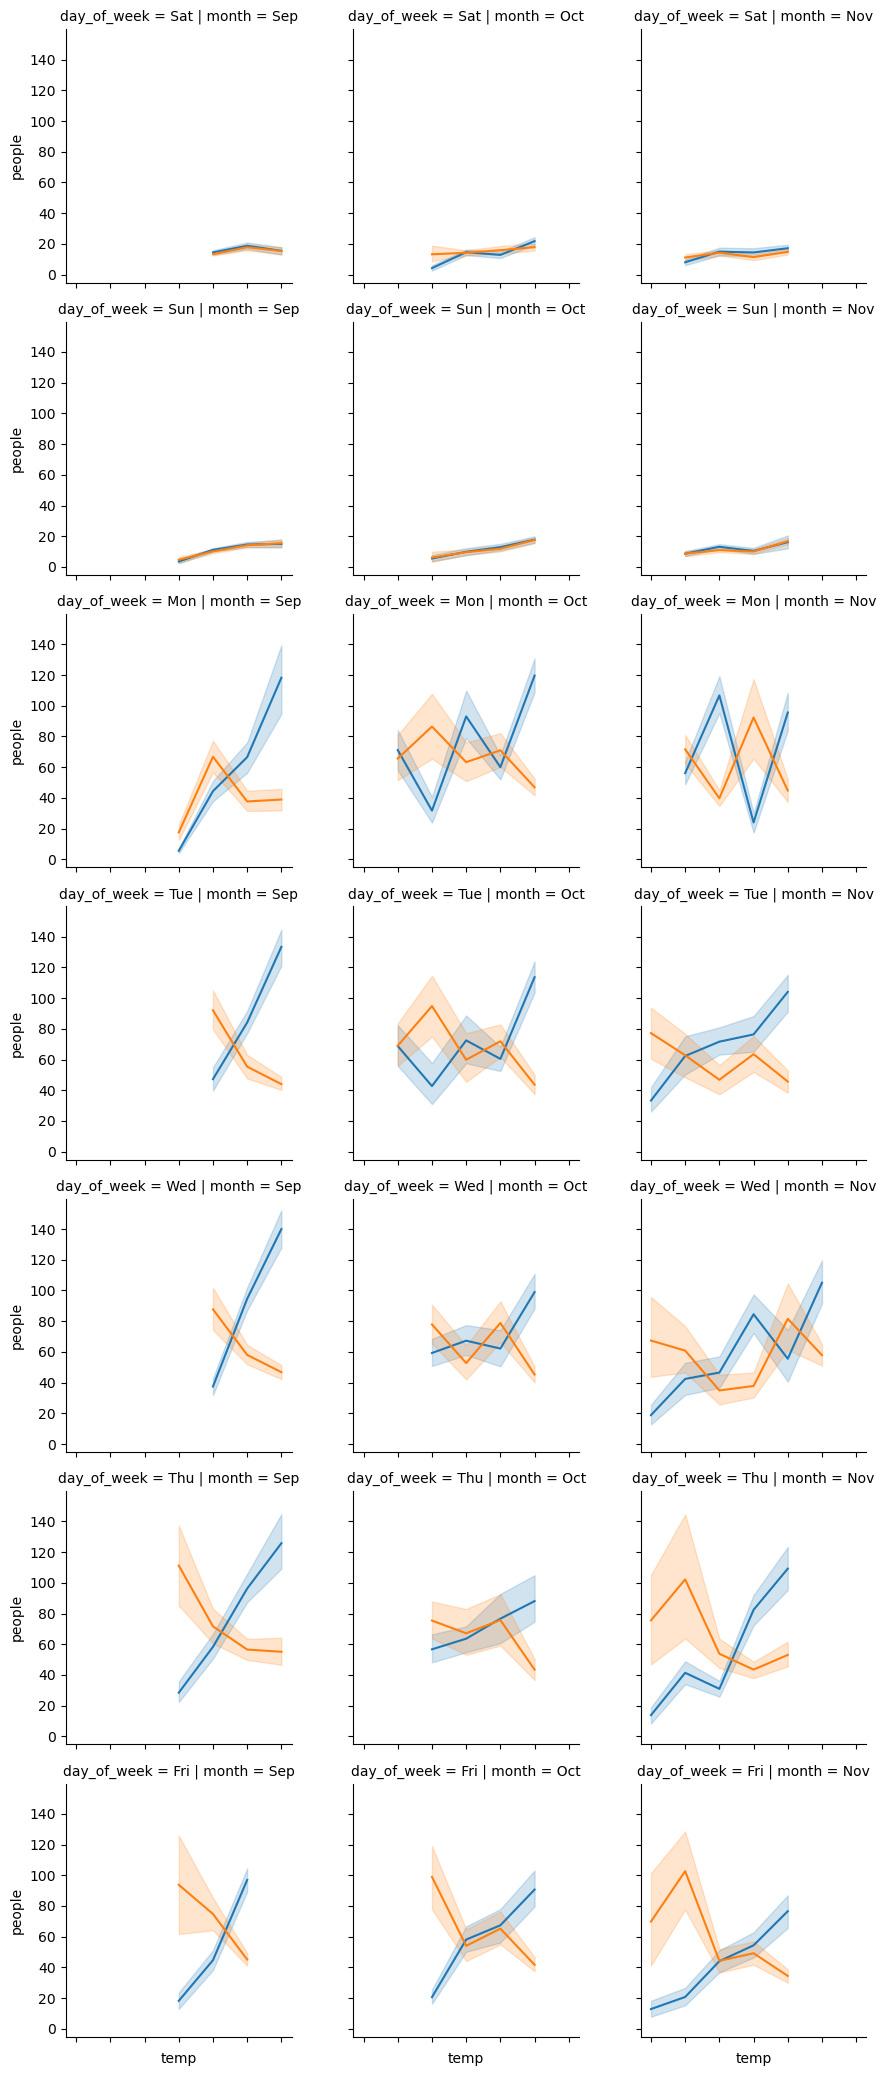

In [16]:
g = sns.FacetGrid(df_ut, col='month',row='day_of_week',hue='metric')
g.map(sns.lineplot,'temp' ,'people')
for axes in g.axes.flat:
    axes.set_xticklabels(
        axes.get_xticklabels(), rotation=65, horizontalalignment="right"
    )

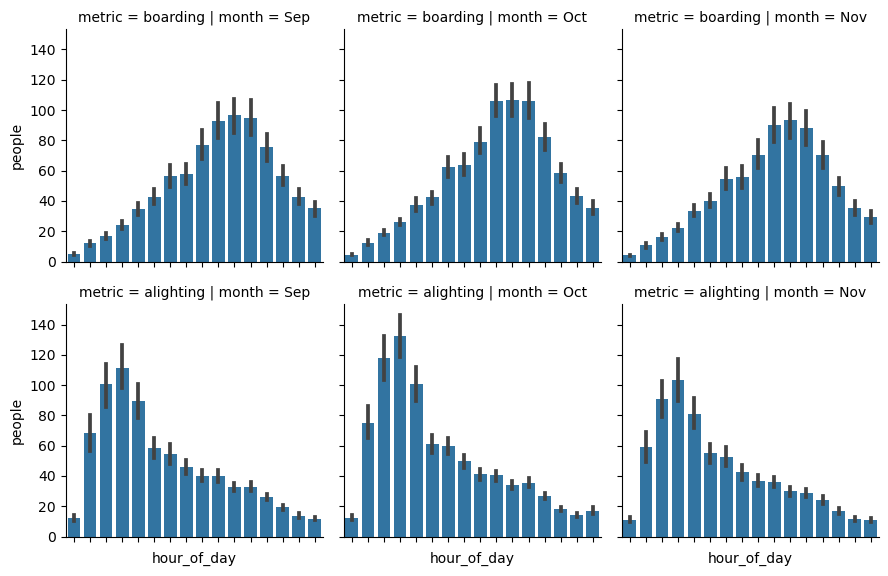

In [17]:
g = sns.FacetGrid(df_ut, col='month',row='metric')
g.map(sns.barplot,'hour_of_day' ,'people')
for axes in g.axes.flat:
    axes.set_xticklabels(
        axes.get_xticklabels(), rotation=15, horizontalalignment="right"
    )

#### Conclusion drawn

People boarding the bus increases from 6:00 till 16:00 and then decreases till end of day(i.e. 21:00) for all the months.<br>
People de-boarding the bus increases hugely from 6:00 to 7:00, keeps increasing till 9:00 and then mostly decreases till end of day(i.e. 21:00) during the entire period.<br>
The boarding/de-boarding pattern is similar across all the months.<br>

<Axes: xlabel='hour_of_day', ylabel='people'>

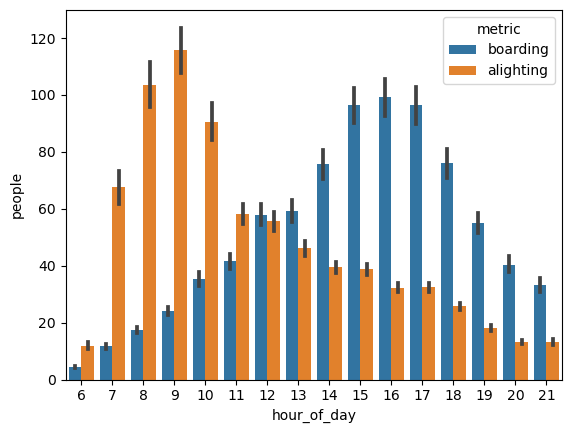

In [18]:
sns.barplot(x='hour_of_day',y='people',data=df_ut,hue='metric')

In [19]:
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.express as px
pivot_t = df.pivot_table(index='hour_of_day', columns='day_of_week', values='boarding', aggfunc='mean')
fig = sp.make_subplots(rows=2, cols=4, subplot_titles=pivot_t.columns)
for i, day in enumerate(pivot_t.columns):
    scatter_plot = go.Scatter(x=pivot_t.index, y=pivot_t[day], mode='lines', name=day)
    fig.add_trace(scatter_plot, row=(i // 4) + 1, col=(i % 4) + 1)
    fig.update_xaxes(title_text='Hour of Day', tickvals=list(range(6, 23)), row=(i // 4) + 1, col=(i % 4) + 1)
    fig.update_yaxes(title_text='Average Boarding Ridership', row=(i // 4) + 1, col=(i % 4) + 1)
fig.update_layout(title='Average Boarding Ridership Trend by Hour of Day for Each Day of the Week',
                  showlegend=False, height=800, width=1000)

#### Conclusion drawn

Checking for the average boarding ridership for individual days. Weekends have comparatively lesser traffic as compared to weekdays.

<Figure size 1000x600 with 0 Axes>

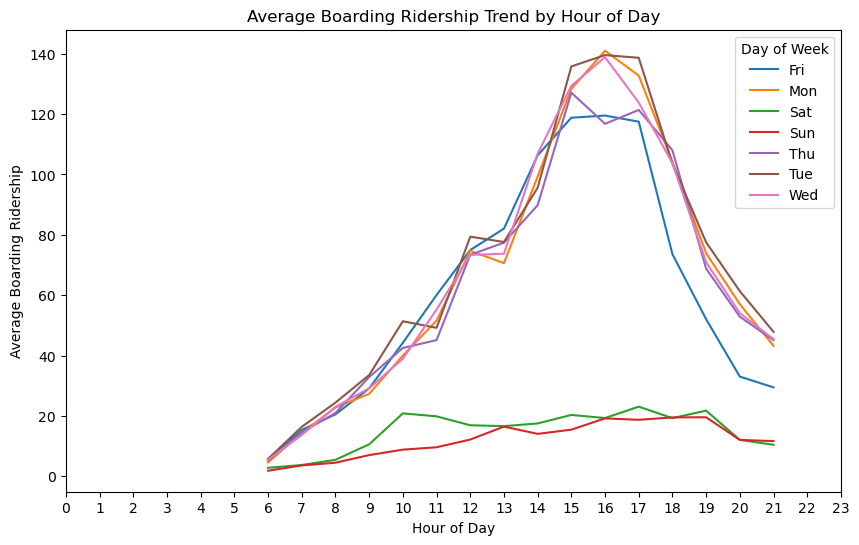

In [20]:
plt.figure(figsize=(10, 6))
pivot_table = df.pivot_table(index='hour_of_day', columns='day_of_week', values='boarding', aggfunc='mean')
pivot_table.plot(kind='line', figsize=(10, 6))
plt.title('Average Boarding Ridership Trend by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Boarding Ridership')
plt.legend(title='Day of Week')
plt.xticks(ticks=range(24), labels=range(24))
plt.show()

#### Conclusion drawn

During weekdays, we observe a notably higher average boarding rate compared to weekends. Furthermore, there's a significant spike in boardings between the hours of 2:00 PM and 7:00 PM.

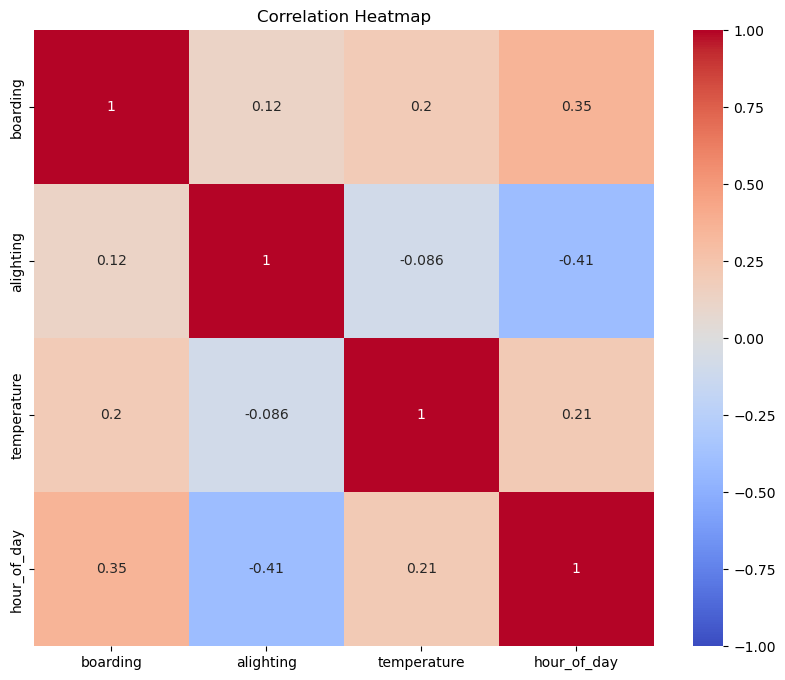

Correlations with 'boarding' as the target variable:

boarding       1.000000
hour_of_day    0.351907
temperature    0.197585
alighting      0.120225
Name: boarding, dtype: float64


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
correlations = correlation_matrix['boarding'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()
print("Correlations with 'boarding' as the target variable:\n")
print(correlations)